## Linear regression

This file contains different implementations of a Linear Regression algorithm.

I am using a public data_set from Kaggle in file Linear_regression_data.csv: https://www.kaggle.com/datasets/tanuprabhu/linear-regression-dataset/

This data set contains a simple 1-dimension data set with the form: y = mx + b, where m and b are the parameters we need to fit from the data to arrive at a prediction y_hat with the least deviation from y in the data.

### Theory

On its simplest form, the **linear regression algorithm** tries to find the parameters that best fit the equation $\hat{y} = m*x + b $, where b is normally known as the bias term, m is the slope, x is a 1 dimension  input or independent variable, while $\hat{y}$ is also a 1 dimension dependent variable or predicted output of the model. 

The algorithm tries to find values for **m** and **b** that minimise the difference between the predicetd output of the model ($\hat{y}$) and the actual output value for the input x (y). This difference is normally defined "error",

Since we have numerous samples (say "n" samples), we define this error as:

$$ error = \sum_{i=1}^{n} (y_{i} - \hat{y}_i) $$

Consequently, the goal of the algorithm is to minimise this error, for wich we use some way to avoid problems with the sign of the output values (predicted and labelled), like mean square of the difference so, we minimise the following **_"cost function"_**: 

$$ J(w,b) = \frac{\text{1}}{\text{n}} * \sum_{i=1}^{n} (y_{i} - \hat{y}_i)^2 \quad \textrm{(1)}$$ 

Notice that, while the algorithm works without averaging the cost value, it is customary to use the average, and frequent to devide by "2n" instead of "n" (because it makes the partial derivative end up divided by 'n').


#### Minimising the Cost Function

To minimise the cost function we use the **gradient descent**, that is, we take the partial derivative of the cost function with respect to the parameters *w* and *b*, and then use that direction to modify the paramerts and re-evaluate the cost function.

$$ w = w - \theta * \frac{\partial J(w,b)}{\partial{w}}  \quad \textrm{(2)}$$
$$ b = b - \theta * \frac{\partial J(w,b)}{\partial{b}}  \quad \textrm{(3)}$$

Where $\theta$ is a small value known as the "**_learning rate_**".

With these small changes of the parameters in the direction that reduces the value of the cost function J(w,b), we iterate until we are satisfied with the value of the error. 

Normally we use 2 criteria to stop iterating:
- we define a number of iterations and stop when we reach it (ex: 1000)
- we define a small enough value and stop iterating when the change in the cost function is smaller than that value after an iteration.

For a simple one-dimensional linear equation, we have:

$$ f_{(w,b)}(X) = \hat{Y} = w*X + b $$

and the partial derivatives are:

$$ \frac{\partial{J(w,b)}}{\partial {w}} = \frac{\text{1}}{\text{n}} * \sum_{i=1}^{n} (w*x_{i} - {y}_i)*x_{i} \quad \textrm{(4)}$$ 

$$ \frac{\partial{J(w,b)}}{\partial {b}} = \frac{\text{1}}{\text{n}} * \sum_{i=1}^{n} (w*x_{i} - {y}_i) \quad \textrm{(5)}$$

### Example:

Let's start by importing some of the libraries we'll use:

In [3]:
import numpy as np
import csv
import random
import copy
import math

First, let's load the data on two variables: X for the independent variables and Y for the dependent variable:

In [4]:
# define the file with input data
file_path = "data/Linear_Regression_data.csv"
 
# load data
try: 
    with open(file_path, 'r') as file:
                # Create a CSV reader object
                reader = csv.DictReader(file)
                
                # Initialise an empty lists to store the data
                X = []
                Y = []
    
                # Iterate over each row in the CSV file
                for row in reader:
                    # Append the row as a dictionary to the data list
                    X.append(int(row["X"]))
                    Y.append(float(row["Y"]))

except:
     print(f"Error opening file")

assert len(X) == len(Y)

To begin, let's look at the data. This task is particularly simple with this exercise since we have a 1-dimension vector as input and a 1-D vector as output, which makes it easy to plot.

If we had many dimensions in either the input or output, we would have to use some other techniques to have an initial perception of the data (ex: PCA or others).

In [5]:
# First, let's look at the size of the vectors.
# We defined them as lists, so we can't use shape attribute of arrays:
print(f"Dimension of input X: {len(X)}")
print(f"Dimension of output Y: {len(Y)}")

print(f"First 10 values for X: {X[0:10]}")
print(f"First 10 values for X: {Y[0:10]}")

Dimension of input X: 300
Dimension of output Y: 300
First 10 values for X: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
First 10 values for X: [3.888888889, 4.555555556, 5.222222222, 5.888888889, 6.555555556, 7.222222222, 7.888888889, 8.555555556, 9.222222222, 9.888888889]


Text(0, 0.5, 'Output: Y')

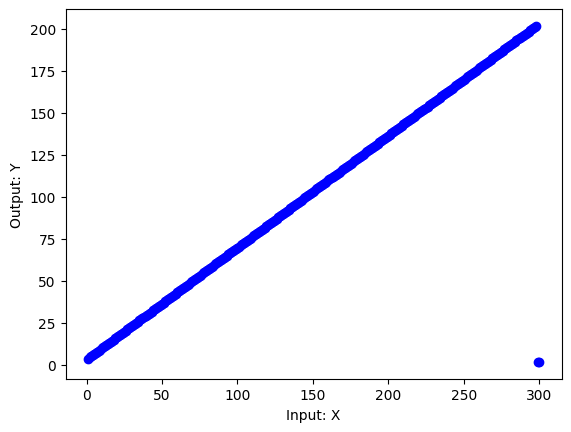

In [6]:
# Now, let's plot the data. We will use matplotlib:
import matplotlib.pyplot as plt

plt.scatter(X, Y, color="blue")

plt.xlabel("Input: X")
plt.ylabel("Output: Y")

Looking at the plot, we find at least 2 things:

- The relationship between input and output is very linear. We should expect a high accuracy in the prediction once we find the parameters for the underlying equation
- There're strange outliers at the end of the sample

In [7]:
# Looking that the last 5 values on the output, we have:

Y[-5:]

[200.5555556, 201.2222222, 201.8888889, 1.888888889, 1.888888889]

There's clearly an anomaly with last the values of the output.

Normally we should evaluate if the values originate in measurement problems, faulty equipment, etc. If the values do not represent the normal behaviour of the output/dependent variable, it might be best to exclude them from the sample. Notice that this decision is best taken in coordination with field experts.

For this exercise, we will keep them.

Now, we need to separate the data set into **training and testing sets**. Notice that it is customary to use also a cross validation set to fine-tune the algorithm; we won't use this set here since neither the data nor the algorithm is  overly complex.

Normally we would use libraries to randomly separate the data sets (sklearn has a very efficient one) but, for this exercise, we will use a more manual approach to demonstrate the use of the algorithm.

In [8]:
# let's define the number of samples in the data and 
# the size of the training set (we'll use 25%)
n = len(X)
sz_train = int(n*0.75)

# Now, we'll create a random list to separate the data sets
i = [j for j in range(n)]
random.shuffle(i)

# and then use the randomised list to separate the data set
X_train = [X[j] for j in i[0:sz_train]]
Y_train = [Y[j] for j in i[0:sz_train]]

X_test = [X[j] for j in i[sz_train:]]
Y_test = [Y[j] for j in i[sz_train:]]

assert len(Y_train) + len(Y_test) == len(X)

print(f"Size Train set= {len(Y_train)}\nSize Test set= {len(Y_test)}")

Size Train set= 225
Size Test set= 75


Now, to implement the algorithm we will use the following functions:

- cost_function(): determines the value of the cost function for a given input sample X, parameters w and b, and actual output y.
- gradient(): determines the values for the partial derivatives dj/dw and dj/db
- fit(): determines the optimal values for the parameters 

In [9]:
# Cost function
""" 
Notice that we can calculate this function with loops or with vectors, 
the latter being more efficient.
"""

# implemented with for-loop
def cost_function(X,w,b,Y):

    m = len(X) # sample size

    cost = 0
    for i in range(len(Y)):
        cost += np.power(X[i]*w + b - Y[i], 2)

    cost = cost/m

    return cost

# implemented with vectors
def cost_function_vect(X,w,b,Y):

    m = len(X) # sample size
    
    # transforming lists into vectors
    X = np.array(X)
    Y = np.array(Y)

    Y_hat = X*w + b

    cost = np.sum(np.power(Y_hat-Y,2)) / m

    return cost


In [10]:
import time

# Review for-loop efficiency
ini_time = time.time()
error = cost_function(X_train, 0.03, 0.005, Y_train)
#print(error)
end_time = time.time()
forloop_time = end_time - ini_time
print(f"Time for for-loop: {forloop_time} ms")

# Review vectorised calculation efficiency
ini_time = time.time()
error = cost_function_vect(X_train, 0.03, 0.005, Y_train)
#print(error)
end_time = time.time()
vector_time = end_time - ini_time
print(f"Time for vectorised calc: {vector_time} ms")

print(f"\nVector calculation is {(1-vector_time/forloop_time)*100:.2f}% more efficient for the train set.")

Time for for-loop: 0.00042319297790527344 ms
Time for vectorised calc: 0.00016355514526367188 ms

Vector calculation is 61.35% more efficient for the train set.


Now we'll code the partial derivatives (gradient) with the equations (4) and (5):

$$ \frac{\partial{J(w,b)}}{\partial {w}} = \frac{\text{1}}{\text{n}} * \sum_{i=1}^{n} (w*x_{i} - {y}_i)*x_{i} \quad \textrm{(4)}$$ 

$$ \frac{\partial{J(w,b)}}{\partial {b}} = \frac{\text{1}}{\text{n}} * \sum_{i=1}^{n} (w*x_{i} - {y}_i) \quad \textrm{(5)}$$

In [11]:
# This function calculates the partial derivatives, considering that w and b are scalar values
def gradient(X,Y,w,b):
    
    X = np.array(X)
    Y = np.array(Y)
    
    n = len(X) # sample size

    #initialising the values
    dj_dw, dj_db = 0,0

    # vector calculation
    dj_dw = np.dot(X*w - Y,X) / n
    dj_db = np.sum(X*w - Y) / n


    return dj_dw, dj_db

Now we'll code the fit function that will optimise the value of the parameters w and b. We will use the vector calculation form for the cost function. 

We will use the following default values:
- w, b = 0
- theta = 0.001 (learning rate)
- number of iterations= 1,000 

Finally, we will include the values of the cost function as we iterate.

In [12]:
def fit_linear(X, Y, w_ini = 0, b_ini = 0, cost_function_vect=cost_function_vect, gradient=gradient, theta=0.001, num_iter = 1000):

    # set initial values
    J_values = []
    w = copy.deepcopy(w_ini)
    b = b_ini

    # iterations
    for i in range(num_iter):

        # calculate gradients according to eqs (4) and (5)
        dj_dw, dj_db = gradient(X,Y,w,b)

        # updating parameter values according to eqs (2) and (3)
        w = w - theta * dj_dw
        b = b - theta * dj_db

        # store cost function values
        J_values.append(cost_function_vect(X,w,b,Y))

        # print out values to evaluate convergence
        if i < 100000: # to limit the 
        
            if i% math.ceil(num_iter/10) == 0:
                print(f"Iteration {i:4d}: Cost value {J_values[-1]:6.2f} ")
                #print(f"w: {w} b:{b}")

    return w, b, J_values


Now, let's execute the functions to get the values:

In [13]:
# Notice that we need to try different values for the learning reate, 
# starting with very small ones to avoid "bounding around" the optimum

theta = 0.00001
time_ini_self_coding = time.time()
w_opt, b_opt, J_values = fit_linear(X_train, Y_train, w_ini=0, b_ini=0, theta = theta, num_iter=1000)
time_end_self_coding = time.time()


Iteration    0: Cost value 6871.39 
Iteration  100: Cost value 357.90 
Iteration  200: Cost value 357.90 
Iteration  300: Cost value 357.89 
Iteration  400: Cost value 357.89 
Iteration  500: Cost value 357.88 
Iteration  600: Cost value 357.88 
Iteration  700: Cost value 357.87 
Iteration  800: Cost value 357.87 
Iteration  900: Cost value 357.86 


In [14]:
# Now, let's create a function to calculate predictive values 
def projection(X, w, b):

    X = np.array(X)
    Y_hat = X*w + b

    return Y_hat

In [15]:
# And now, let's evaluate the accuracy of the prediction for the training set
Y_hat_train = projection(X_train, w_opt, b_opt)

Y_hat_test = projection(X_test, w_opt, b_opt)

Now, let's plot the data and the function achieved with logistic regression:

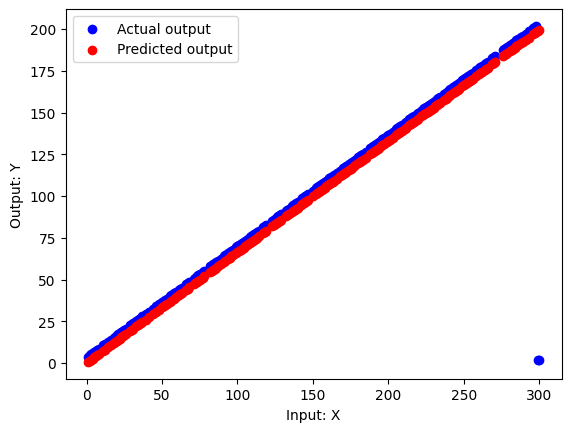

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train, color="blue")
plt.scatter(X_train, Y_hat_train, color="red")

plt.xlabel("Input: X")
plt.ylabel("Output: Y")
plt.legend(["Actual output", "Predicted output"])


As expected, we have a very good match between the prediction and the actual data. We can evaluate this match with the r2-score as shown here:

In [17]:
from sklearn.metrics import r2_score

# Train set
score = r2_score(Y_train, Y_hat_train)
print("The accuracy of the model on train set is {}%".format(round(score, 4) *100))

# Test set
score_test = r2_score(Y_test, Y_hat_test)
print("The accuracy of the model on test set is {}%".format(round(score_test, 4) *100))


The accuracy of the model on train set is 88.92%
The accuracy of the model on test set is 99.68%


#### SKLearn linear regression

Now let's use the algorithm from the sklearn library and compare the results. 

Notice that, to use Sklearn, we need to transform the lists to numpy arrays and reshape them.

In [18]:
from sklearn.linear_model import LinearRegression

# First, we need to format the lists as numpy arrays to work with sklearn
X_train_array = np.array(X_train)
Y_train_array = np.array(Y_train)
X_test_array = np.array(X_test)

# Now, we need to reshape the arrays to form matrices
X_train_array = X_train_array.reshape(-1,1)
Y_train_array = Y_train_array.reshape(-1,1)
X_test_array = X_test_array.reshape(-1,1)

# Now, let's fit the model
time_ini_sklearn = time.time()
reg = LinearRegression().fit(X_train_array, Y_train_array)
time_end_sklearn = time.time()

print(f"SkLearn coefficients: {reg.coef_}")

y_hat_train_sk = reg.predict(X_train_array)
y_hat_test_sk = reg.predict(X_test_array)

SkLearn coefficients: [[0.63033125]]


Now, let's evaluate the performance:

In [19]:
from sklearn.metrics import r2_score

# Train set
score = r2_score(Y_train, y_hat_train_sk)
print(f"The accuracy of the model on train set is {score*100:.2f}%")

# Test set
score_test = r2_score(Y_test, y_hat_test_sk)
print(f"The accuracy of the model on test set is {score_test*100:.2f}%")

# Time calculation comparison
self_fit_time = time_end_self_coding - time_ini_self_coding
sklearn_fit_time = time_end_sklearn - time_ini_sklearn

# The calculation time is 
print(f"Sklearn calculation is {(1-sklearn_fit_time/self_fit_time)*100:.2f}% more efficient for the train set.")

The accuracy of the model on train set is 89.28%
The accuracy of the model on test set is 99.63%
Sklearn calculation is 3.94% more efficient for the train set.
